In [1]:
#Load Modules/Libraries
from azure.storage.blob import BlobClient # Connection to Azure Directory/Blob Service
import pandas as pd  #read and wrangling
import numpy as np   #linear algebra
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split  #ML algorithm
from keras.preprocessing.sequence import pad_sequences  #ML algorithm
import gensim
from sklearn.linear_model import LogisticRegression  #ML algorithm
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns  #other visualizations
import matplotlib.pyplot as plt
from keras.models import Sequential  #ML algorithm
from keras.layers import LSTM, Dense, Embedding #ML algorithm
from bs4 import BeautifulSoup  #Scrapping library
from pandasql import sqldf #SQL for data wrangling
import nltk #NLP tool kit
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olajideajayi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Azure credential and Synthea Datasets
blob = BlobClient(account_url="https://olastorageac.blob.core.windows.net",
                  container_name="syntheacsv",
                  blob_name="encounters.csv",
                  credential="cbRvJaX7t1PDyGQz/GOZ1Ee1odMJA/1hI0XWS3YY8TJGvWkGzO644EwYQ6n/eEXAYXoqEOD/Gp9rR9vVlv4mFg==")

In [3]:
#Open dataset
with open("encounters.csv", "wb") as a:
    data = blob.download_blob()
    data.readinto(a)

In [53]:
#Azure credential and Synthea Datasets
blob1 = BlobClient(account_url="https://olastorageac.blob.core.windows.net",
                  container_name="syntheacsv",
                  blob_name="patients.csv",
                  credential="cbRvJaX7t1PDyGQz/GOZ1Ee1odMJA/1hI0XWS3YY8TJGvWkGzO644EwYQ6n/eEXAYXoqEOD/Gp9rR9vVlv4mFg==")

In [54]:
#Open dataset
with open("patients.csv", "wb") as b:
    data = blob1.download_blob()
    data.readinto(b)

In [5]:
#Read Synthea Datasets
encounters = pd.read_csv("encounters.csv")

In [56]:
#Read Synthea Datasets
patients = pd.read_csv("patients.csv")

In [6]:
#Sample data - encounters
encounters.head(5)

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


In [7]:
#Data types - encounters
encounters.dtypes

Id                      object
START                   object
STOP                    object
PATIENT                 object
ORGANIZATION            object
PROVIDER                object
PAYER                   object
ENCOUNTERCLASS          object
CODE                     int64
DESCRIPTION             object
BASE_ENCOUNTER_COST    float64
TOTAL_CLAIM_COST       float64
PAYER_COVERAGE         float64
REASONCODE             float64
REASONDESCRIPTION       object
dtype: object

In [8]:
#Extract necessary fields for modeling
df = encounters[['ENCOUNTERCLASS','DESCRIPTION']]

In [9]:
#Rename header
# create a dictionary, key = old name, value = new name
dict = {'ENCOUNTERCLASS': 'Category', 'DESCRIPTION': 'Message'}
# call rename () method
df.rename(columns=dict,inplace=True)
# print Data frame after rename columns
display(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Category,Message
0,ambulatory,Encounter for symptom
1,wellness,General examination of patient (procedure)
2,ambulatory,Encounter for symptom
3,wellness,General examination of patient (procedure)
4,wellness,General examination of patient (procedure)
...,...,...
53341,wellness,General examination of patient (procedure)
53342,wellness,General examination of patient (procedure)
53343,wellness,General examination of patient (procedure)
53344,wellness,General examination of patient (procedure)


In [10]:
df.shape

(53346, 2)

In [11]:
df.index = range(53346)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

205200

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


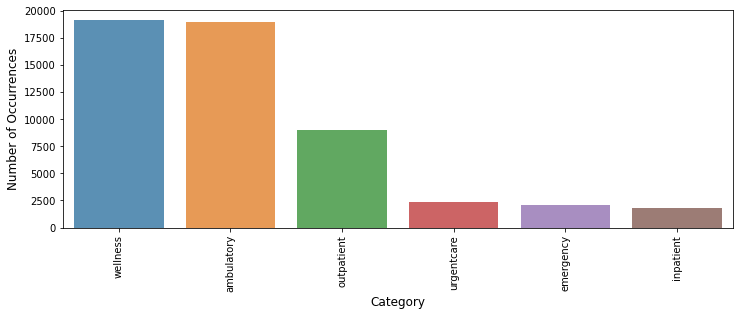

In [12]:
#Data Visualization
cnt_pro = df['Category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [13]:
#Sample messages
def print_message(index):
    example = df[df.index == index][['Message', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

Encounter for symptom
Message: ambulatory


In [14]:
print_message(0)

Encounter for symptom
Message: ambulatory


In [15]:
#Text Preprocessing Below we define a function to convert text to lower-case and strip punctuation/symbols from words
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)

C:\Users\OLAJID~1\AppData\Local\Temp/ipykernel_10764/506405186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message'] = df['Message'].apply(cleanText)


In [16]:
##Tokenization
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.Category]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

C:\Users\OLAJID~1\AppData\Local\Temp/ipykernel_10764/304407695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message'] = df['Message'].apply(cleanText)


Found 53346 unique tokens.


In [17]:
#Tokenization - continued
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (53346, 50)


In [18]:
#train_tagged.values
train_tagged.values

array([TaggedDocument(words=['follow-up', 'encounter'], tags=['ambulatory']),
       TaggedDocument(words=['consultation', 'for', 'treatment'], tags=['outpatient']),
       TaggedDocument(words=['patient', 'encounter', 'procedure'], tags=['outpatient']),
       ...,
       TaggedDocument(words=['follow-up', 'encounter'], tags=['ambulatory']),
       TaggedDocument(words=['general', 'eamination', 'of', 'patient', '(', 'procedure', ')'], tags=['wellness']),
       TaggedDocument(words=['general', 'eamination', 'of', 'patient', '(', 'procedure', ')'], tags=['wellness'])],
      dtype=object)

In [19]:
#Tagging
d2v_model = Doc2Vec(dm=1, dm_mean=1, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 53345/53345 [00:00<00:00, 2681284.49it/s]


In [20]:
print(d2v_model)

Doc2Vec(dm/m,d100,n5,w8,s0.001)


In [21]:
#Length of Model
len(d2v_model.wv)

90

In [22]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))
for i, vec in enumerate(d2v_model.docvecs.vectors):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
          embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

C:\Users\OLAJID~1\AppData\Local\Temp/ipykernel_10764/2431858452.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  for i, vec in enumerate(d2v_model.docvecs.vectors):


In [23]:
#Similarity Scores - 1
d2v_model.wv.most_similar(positive=['infarction'], topn=10)

[('procedure', 0.28974205255508423),
 ('psychiatric', 0.285995215177536),
 ('mental', 0.26792022585868835),
 ('telemedicine', 0.21630819141864777),
 ('detoification', 0.2118249237537384),
 ('non-urgent', 0.1878708153963089),
 ('outpatient', 0.18286840617656708),
 ('check', 0.182259202003479),
 ('disorder', 0.16662032902240753),
 ('regime/therapy', 0.16585460305213928)]

In [24]:
#Similarity Scores - 2
d2v_model.wv.most_similar(positive=['disorder'], topn=10)

[('surgical', 0.2176118642091751),
 ('mental', 0.1883985847234726),
 ('symptom', 0.18406276404857635),
 ('psychiatric', 0.17547710239887238),
 ('thoracic', 0.17139281332492828),
 ('clinic', 0.16693153977394104),
 ('infarction', 0.1666203737258911),
 ('telephone', 0.14498065412044525),
 ('procedure', 0.1403549611568451),
 ('outpatient', 0.13257955014705658)]

In [25]:
#Create the LSTM Model
#init layer
model = Sequential()

#embed word vectors
model.add(Embedding(len(d2v_model.wv)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

#learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(6,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            1820      
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 16,326
Trainable params: 16,326
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Training and Testing Datasets - 85%/15% split
Y = pd.get_dummies(df['Category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, shuffle=False)
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(45344, 50) (45344, 6)
(8002, 50) (8002, 6)


In [27]:
#Fitting and running model
batch_size = 33
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
1375/1375 - 19s - loss: 0.2615 - acc: 0.9090 - 19s/epoch - 14ms/step
Epoch 2/50
1375/1375 - 17s - loss: 0.1132 - acc: 0.9527 - 17s/epoch - 12ms/step
Epoch 3/50
1375/1375 - 17s - loss: 0.1113 - acc: 0.9532 - 17s/epoch - 12ms/step
Epoch 4/50
1375/1375 - 17s - loss: 0.1100 - acc: 0.9534 - 17s/epoch - 12ms/step
Epoch 5/50
1375/1375 - 21s - loss: 0.1090 - acc: 0.9536 - 21s/epoch - 15ms/step
Epoch 6/50
1375/1375 - 19s - loss: 0.1083 - acc: 0.9538 - 19s/epoch - 13ms/step
Epoch 7/50
1375/1375 - 17s - loss: 0.1079 - acc: 0.9538 - 17s/epoch - 13ms/step
Epoch 8/50
1375/1375 - 17s - loss: 0.1077 - acc: 0.9538 - 17s/epoch - 13ms/step
Epoch 9/50
1375/1375 - 17s - loss: 0.1076 - acc: 0.9538 - 17s/epoch - 13ms/step
Epoch 10/50
1375/1375 - 20s - loss: 0.1077 - acc: 0.9538 - 20s/epoch - 14ms/step
Epoch 11/50
1375/1375 - 18s - loss: 0.1074 - acc: 0.9536 - 18s/epoch - 13ms/step
Epoch 12/50
1375/1375 - 20s - loss: 0.1073 - acc: 0.9540 - 20s/epoch - 14ms/step
Epoch 13/50
1375/1375 - 18s - loss: 0

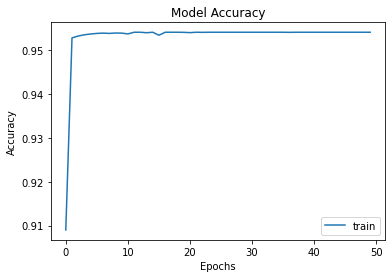

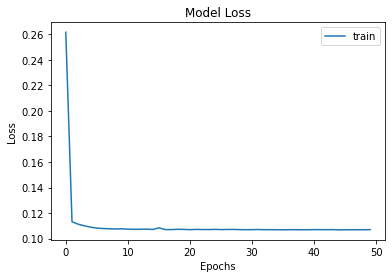

<Figure size 432x288 with 0 Axes>

In [28]:
#Summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.savefig('model_accuracy.png')

#Summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.savefig('model_loss.png')

In [30]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

1417/1417 - 6s - loss: 0.1066 - acc: 0.9540 - 6s/epoch - 4ms/step
251/251 - 1s - loss: 0.1262 - acc: 0.9481 - 1s/epoch - 5ms/step
Train: 0.954, Test: 0.9481


In [31]:
# predict classes+probability for test set
yhat_classes_test = model.predict(X_test)
print(yhat_classes_test)

[[7.2936821e-01 8.3356127e-07 1.1126815e-03 2.6951829e-01 5.4130095e-10
  9.8871089e-10]
 [7.2936821e-01 8.3356127e-07 1.1126815e-03 2.6951829e-01 5.4130095e-10
  9.8871089e-10]
 [7.2936821e-01 8.3356127e-07 1.1126815e-03 2.6951829e-01 5.4130095e-10
  9.8871089e-10]
 ...
 [6.6102248e-09 9.3480634e-10 6.1634226e-11 5.6088054e-09 6.7297284e-10
  1.0000000e+00]
 [6.6102248e-09 9.3480634e-10 6.1634226e-11 5.6088054e-09 6.7297284e-10
  1.0000000e+00]
 [6.6102248e-09 9.3480634e-10 6.1634226e-11 5.6088054e-09 6.7297284e-10
  1.0000000e+00]]


In [32]:
# predict classes+probability for train set
yhat_classes_train = model.predict(X_train)
print(yhat_classes_train)

[[9.4707608e-01 4.7720825e-08 4.6458754e-06 5.2919224e-02 1.6968349e-09
  6.9242739e-10]
 [6.6102248e-09 9.3480634e-10 6.1634226e-11 5.6088054e-09 6.7297284e-10
  1.0000000e+00]
 [9.4707608e-01 4.7720825e-08 4.6458754e-06 5.2919224e-02 1.6968349e-09
  6.9242739e-10]
 ...
 [7.2936821e-01 8.3356127e-07 1.1126815e-03 2.6951829e-01 5.4130095e-10
  9.8871089e-10]
 [7.2936821e-01 8.3356127e-07 1.1126815e-03 2.6951829e-01 5.4130095e-10
  9.8871089e-10]
 [7.2936821e-01 8.3356127e-07 1.1126815e-03 2.6951829e-01 5.4130095e-10
  9.8871089e-10]]


In [33]:
pred_test_labels=np.argmax(yhat_classes_test, axis=1)
pred_test_labels

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [34]:
pred_train_labels=np.argmax(yhat_classes_train, axis=1)
pred_train_labels

array([0, 5, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
validation_size = 200

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

237/237 [==============================] - 1s 5ms/step - loss: 0.1280 - acc: 0.9471
score: 0.13
acc: 0.95


In [36]:
df_pred_test = pd.DataFrame(data=pred_test_labels.flatten())
print(df_pred_test)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
7997  5
7998  5
7999  5
8000  5
8001  5

[8002 rows x 1 columns]


In [37]:
df_pred_train = pd.DataFrame(data=pred_train_labels.flatten())
print(df_pred_train)

       0
0      0
1      5
2      0
3      5
4      5
...   ..
45339  0
45340  0
45341  0
45342  0
45343  0

[45344 rows x 1 columns]


In [38]:
df_train=df.head(45344)

In [39]:
Final_train = pd.concat([df_train, df_pred_train], axis=1, ignore_index=True)

In [40]:
#Include column names
Consolidated = Final_train.rename(columns = {0: 'True_Category',1: 'Message',2: 'P_Category'}, inplace = False)

In [41]:
#Recode basket or bucket data
a="""select 
True_Category,
Message,
case when P_Category=0 then 'ambulatory'
     when P_Category=1 then 'emergency'
     when P_Category=2 then 'inpatient'
     when P_Category=3 then 'outpatient'
     when P_Category=4 then 'urgentcare'
     when P_Category=5 then 'wellness'
     else 'nontriage'
end as Predicted_Basket
from Consolidated;"""
pysqldf = lambda a: sqldf(a, globals())
encounters_df_train = pysqldf(a)

In [42]:
df_enc=encounters.head(45344)

In [58]:
#Relevant records and fields from encounters and patients data
b="""select 
x.PATIENT,
x.START,
(y.FIRST||' '||y.LAST) as Patient_Name,
y.BIRTHDATE,
y.MARITAL,
y.RACE,
y.GENDER
from df_enc x
left join patients y on x.PATIENT=y.Id;"""
pysqldf = lambda b: sqldf(b, globals())
df_enc_pat = pysqldf(b)

In [59]:
Final_Consolidated = pd.concat([df_enc_pat, encounters_df_train ], axis=1, ignore_index=True)

In [60]:
#Rename columns
Final_Results = Final_Consolidated.rename(columns = {0: 'Patient_ID',1: 'Date_of_Message',2: 'Patient_Name',3: 'Patient_DOB',4: 'Patient_Marital_Status',5: 'Patient_Race',6: 'Patient_Gender',7: 'True_Basket',8: 'Patient_Message',9: 'Predicted_Basket'}, inplace = False)

In [61]:
#Triaged ambulatory report
b="""select * from Final_Results where Predicted_Basket='ambulatory';"""
pysqldf = lambda b: sqldf(b, globals())
ambulatory = pysqldf(b)

In [62]:
#Triaged emergency report
b="""select * from Final_Results where Predicted_Basket='emergency';"""
pysqldf = lambda b: sqldf(b, globals())
emergency = pysqldf(b)

In [63]:
#Triaged inpatient report
b="""select * from Final_Results where Predicted_Basket='inpatient';"""
pysqldf = lambda b: sqldf(b, globals())
inpatient = pysqldf(b)

In [64]:
#Triaged outpatient report
b="""select * from Final_Results where Predicted_Basket='outpatient';"""
pysqldf = lambda b: sqldf(b, globals())
outpatient = pysqldf(b)

In [65]:
#Triaged urgentcare report
b="""select * from Final_Results where Predicted_Basket='urgentcare';"""
pysqldf = lambda b: sqldf(b, globals())
urgentcare = pysqldf(b)

In [66]:
#Triaged wellness report
b="""select * from Final_Results where Predicted_Basket='wellness';"""
pysqldf = lambda b: sqldf(b, globals())
wellness = pysqldf(b)

In [67]:
#Export individual and Final_Results to csv
Final_Results.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\Final_Results.csv', index = False)
ambulatory.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\ambulatory_Results.csv', index = False)
emergency.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\emergency_Results.csv', index = False)
inpatient.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\inpatient_Results.csv', index = False)
outpatient.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\outpatient_Results.csv', index = False)
urgentcare.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\urgentcare_Results.csv', index = False)
wellness.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\2 JohnB Pipeline\Triage Model\wellness_Results.csv', index = False)